XGBoost est reconnu pour offrir une tr√®s bonne pr√©cision dans les t√¢ches de r√©gression, notamment gr√¢ce √† sa structure en arbres de d√©cision successifs. Il optimise les pr√©dictions en corrigeant les erreurs des arbres pr√©c√©dents (boosting), ce qui le rend plus performant que des mod√®les simples comme la r√©gression lin√©aire.

Nous avons choisi XGBoost comme premier mod√®le pour pr√©dire la valeur marchande des joueurs en raison de ses nombreux avantages adapt√©s √† ce type de probl√©matique :

Tr√®s performant pour les t√¢ches de r√©gression gr√¢ce √† l‚Äôapproche du boosting qui corrige les erreurs √† chaque it√©ration.

Robuste aux valeurs extr√™mes et bruit√©es, ce qui est fr√©quent dans les donn√©es footballistiques.

Capable de capturer des relations non lin√©aires complexes entre les caract√©ristiques du joueur (√¢ge, poste, performance, etc.) et sa valeur marchande.

Fournit une interpr√©tabilit√© utile : on peut savoir quelles variables influencent le plus la valeur pr√©dite.

Rapide et efficace, m√™me sur des datasets assez volumineux, ce qui permet de tester plusieurs versions rapidement.

Int√®gre des m√©canismes pour √©viter le surapprentissage, comme la r√©gularisation.

En r√©sum√©, XGBoost repr√©sente un bon compromis entre pr√©cision, rapidit√©, robustesse et interpr√©tabilit√©, ce qui en fait un excellent point de d√©part pour un projet de pr√©diction appliqu√© au football.

Comment on a test√© la performance de XGBoost :
On a entra√Æn√© le mod√®le sur des donn√©es connues (ex. : joueurs avec une vraie valeur marchande).

On a test√© le mod√®le sur d‚Äôautres joueurs qu‚Äôil n‚Äôa jamais vus pour voir s‚Äôil arrive √† bien pr√©dire leur valeur.

Pour mesurer la qualit√© des pr√©dictions, on a utilis√© des m√©triques comme :

MAE (erreur absolue moyenne) ‚Üí "En moyenne, je me trompe de combien de millions ?"

RMSE (erreur quadratique moyenne) ‚Üí "Je p√©nalise plus les grosses erreurs"

R¬≤ (score de qualit√© globale) ‚Üí "Est-ce que le mod√®le explique bien les variations des valeurs ?"

On a aussi fait √ßa plusieurs fois avec des splits diff√©rents des donn√©es (validation crois√©e) pour s‚Äôassurer que ce n‚Äô√©tait pas juste de la chance.



On a utilis√© XGBoost comme premier choix, car c‚Äôest un mod√®le tr√®s performant par d√©faut, utilis√© dans plein de comp√©titions.

On voulait d‚Äôabord avoir un mod√®le de base solide avant de perdre du temps √† comparer avec 5 autres mod√®les.



In [38]:
import os
os.chdir('C:/Users/bahri/Desktop/Football_performance_analysis')

In [39]:
import os
print(os.getcwd())


C:\Users\bahri\Desktop\Football_performance_analysis


In [40]:
import pandas as pd
df = pd.read_excel('data/cleaned/sofifa/sofifa_players_cleaned.xlsx')

In [41]:
import pandas as pd
import unicodedata
import os

# Always create the directory in case it's missing
os.makedirs('data/cleaned/sofifa', exist_ok=True)

# Load the Excel file
df = pd.read_excel('data/cleaned/sofifa/sofifa_players_cleaned.xlsx')

exclude_col = 'Picture'

def remove_accents(text):
    if isinstance(text, str):
        text = unicodedata.normalize('NFKD', text)
        return ''.join(c for c in text if not unicodedata.combining(c))
    return text

def clean_string(value):
    if isinstance(value, str):
        value = remove_accents(value)
        value = value.strip().lower().replace(" ", "_")
    return value

def clean_dataframe(df, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []

    # Clean column names
    df.columns = [clean_string(col) for col in df.columns]

    # Clean object columns except excluded
    for col in df.select_dtypes(include=['object']).columns:
        if col not in exclude_columns:
            df[col] = df[col].apply(clean_string)
    
    return df

# Remove dots in the 'name' column if it exists
if 'name' in df.columns:
    df['name'] = df['name'].str.replace('.', '', regex=False)

# Clean the DataFrame
df_cleaned = clean_dataframe(df, exclude_columns=[exclude_col])
df_cleaned['market_value_million'] = (df_cleaned['value'] / 1_000_000).round(1)
df_cleaned['wage_k'] = (df_cleaned['wage'] / 1_000).round(1)


# Save cleaned version
output_path = 'data/cleaned/sofifa/sofifa_players_clnd.xlsx'
df_cleaned.to_excel(output_path, index=False)
print(f"‚úÖ Data cleaned and saved to: {output_path}")


KeyError: 'value'

In [ ]:
df = pd.read_excel('data/cleaned/sofifa/sofifa_players_cleaned.xlsx')

In [ ]:
df['foot'] = df['foot'].map({'left': 0, 'right': 1})
df = pd.get_dummies(df, columns=['best_position', 'body_type'], drop_first=False)

KeyError: 'foot'

In [ ]:

# Convert all True/False to 1/0
df_preprocessed = df.replace({'VRAI': 1, 'FAUX': 0})
# or, better for bool dtype columns:
df_preprocessed = df.astype({col: int for col in df_preprocessed.select_dtypes(include='bool').columns})
df_preprocessed.to_excel('data/cleaned/sofifa/sofifa_players_clnd.xlsx', index=False)


In [ ]:
# Contract length
df['contract_length'] = df['contract_end'] - df['contract_start']
# Create age groups: young (<=23), peak (24-28), veteran (>28)
df['age_group'] = pd.cut(df['age'], bins=[16, 23, 28, 40], labels=['young', 'peak', 'veteran'])
# One-hot encode age_group (drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['age_group'], drop_first=False)



In [ ]:
df = df.replace({'VRAI': 1, 'FAUX': 0})
# or, better for bool dtype columns:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
df.to_excel('data/cleaned/sofifa/sofifa_players_clnd.xlsx', index=False)

In [ ]:
import os
os.chdir("c:/Users/bahri/Desktop/Football_performance_analysis")


In [42]:
import pandas as pd
df=pd.read_excel('data/cleaned/sofifa/sofifa_players.xlsx')

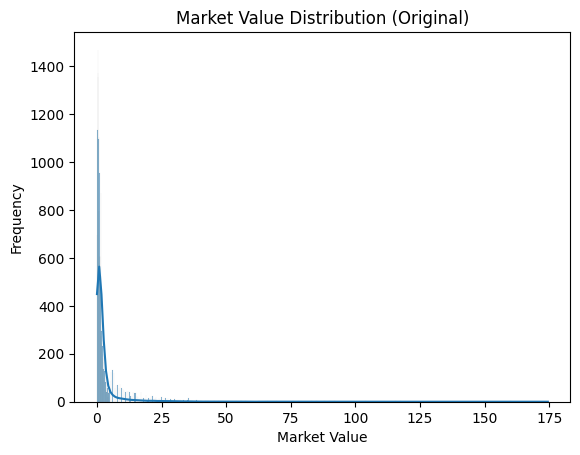

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['market_value_m'], kde=True)
plt.title("Market Value Distribution (Original)")
plt.xlabel("Market Value")
plt.ylabel("Frequency")
plt.show()


If skewness > +1, the data is highly right-skewed

If 0.5 < skewness ‚â§ 1, it's moderately right-skewed

If skewness ~ 0, it's approximately symmetric

In [44]:
from scipy.stats import skew

original_skew = skew(df['market_value_m'].dropna())
print(f"Original Skewness: {original_skew:.2f}")


Original Skewness: 8.43


In [45]:
import numpy as np


df['log_market_value'] = np.log1p(df['market_value_m'])  # log(1 + x)

In [46]:
from scipy.stats import skew
print("Skew after log transform:", skew(df['log_market_value'].dropna()))


Skew after log transform: 1.872792285034762


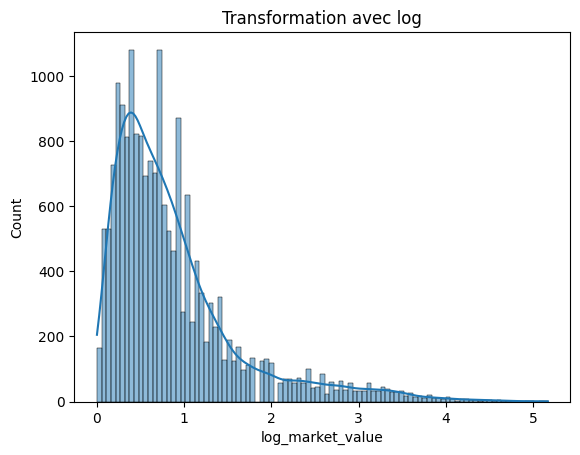

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['log_market_value'], kde=True)
plt.title("Transformation avec log")
plt.show()

le log a trop compress√© les grandes valeurs.donc on va essayer une autre methode

In [51]:
df=pd.read_excel("merged_players.xlsx")

Lambda utilis√©: 0.15653575047456134
Skew apr√®s Box-Cox: 0.0640279744615235


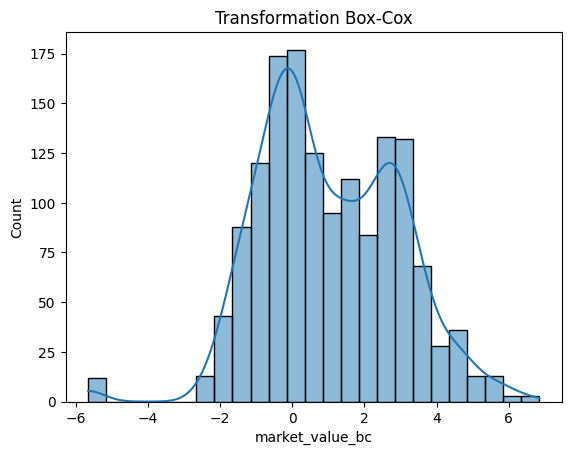

In [53]:
from scipy.stats import boxcox

df['market_value_bc'], fitted_lambda = boxcox(df['value_m'] + 1e-6)  # √©viter les z√©ros
print("Lambda utilis√©:", fitted_lambda)
print("Skew apr√®s Box-Cox:", skew(df['market_value_bc'].dropna()))
sns.histplot(df['market_value_bc'], kde=True)
plt.title("Transformation Box-Cox")
plt.show()


maintenant on une distribution bien √©quilibr√©e, sans queue dominante √† gauche ou √† droite.

on doit pas oublier de tu appliquer l‚Äôinverse de Box-Cox pour retrouver les vraies valeurs.

on doit choisir les bonnes features a utiliser premierement 

Calculer les corr√©lations num√©riques avec la cible pour les eliminer les fortes corr√©lations

entrainement avec la variable cible transform√©e par le log

In [54]:
import pandas as pd

# Suppose que df est ton DataFrame et 'market_value_m' est la variable cible
correlations = df.corr(numeric_only=True)['market_value_m'].sort_values(ascending=False)

print(correlations)


KeyError: 'market_value_m'

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# Define your features and target
features = [
    'age',
    'height',
    'weight',
    'overall_rating',
    'potential',
    'best_overall',
    'international_reputation',
    'skill_moves',
    'weak_foot',
    
    # Statistiques globales
    'base_stats',
    'total_stats',
    'total_attacking',
    'total_skill',
    'total_movement',
    'total_power',
    'total_mentality',
    'total_defending',
    'total_goalkeeping',
    
    # Attributs techniques
    'short_passing',
    'long_passing',
    'crossing',
    'finishing',
    'heading_accuracy',
    'curve',
    'dribbling',
    'ball_control',
    'long_shots',
    'fk_accuracy',
    'penalties',
    
    # Attributs physiques / mouvement
    'acceleration',
    'sprint_speed',
    'agility',
    'balance',
    'reactions',
    'jumping',
    'stamina',
    'strength',
    
    # Mental
    'aggression',
    
    # D√©fense
    'defensive_awareness',
    'standing_tackle',
    'sliding_tackle'
]

X = df[features]
y = df['log_market_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)



In [ ]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_log = model.predict(X_test)
y_pred_real = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)


In [ ]:
# Predict
y_pred = model.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test_real, y_pred_real))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))
print("R¬≤:", r2_score(y_test_real, y_pred_real))





MAE: 0.35960873601887444
RMSE: 2.221002237629971
R¬≤: 0.919075174836372


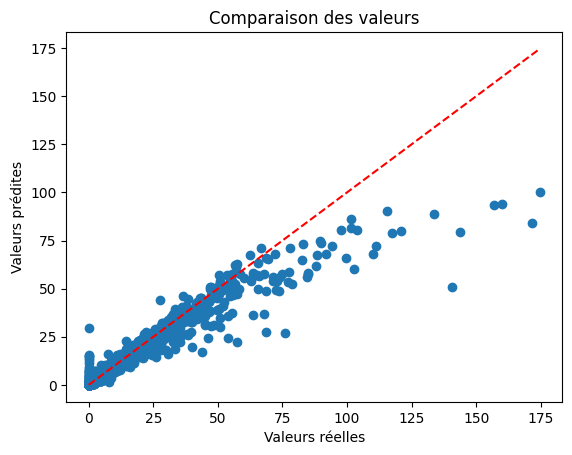

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_real, y_pred_real)
plt.xlabel("Valeurs r√©elles")
plt.ylabel("Valeurs pr√©dites")
plt.title("Comparaison des valeurs")
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], 'r--')  # diagonale parfaite
plt.show()


In [ ]:
import numpy as np
comparison_df = pd.DataFrame({
    'Actual (‚Ç¨M)': np.expm1(y_test),
    'Predicted (‚Ç¨M)': np.expm1(model.predict(X_test))
})
print(comparison_df.head(10))


       Actual (‚Ç¨M)  Predicted (‚Ç¨M)
18229          0.1        0.092535
2480           3.8        4.372221
12727          0.8        0.918570
4128           1.6        1.571609
6827           2.0        2.112266
1710           1.9        1.810383
11359          0.7        0.605523
9248           1.2        1.230873
828           12.0       12.090456
3194           3.0        3.258698


In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


NameError: name 'xgb' is not defined

entrainement du modele avec la variable cible transform√©e avec box cox

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# S√©paration des donn√©es
features = [
    'age',
    'height',
    'weight',
    'overall_rating',
    'potential',
    'best_overall',
    'international_reputation',
    'skill_moves',
    'weak_foot',
    
    # Statistiques globales
    'base_stats',
    'total_stats',
    'total_attacking',
    'total_skill',
    'total_movement',
    'total_power',
    'total_mentality',
    'total_defending',
    'total_goalkeeping',
    
    # Attributs techniques
    'short_passing',
    'long_passing',
    'crossing',
    'finishing',
    'heading_accuracy',
    'curve',
    'dribbling',
    'ball_control',
    'long_shots',
    'fk_accuracy',
    'penalties',
    
    # Attributs physiques / mouvement
    'acceleration',
    'sprint_speed',
    'agility',
    'balance',
    'reactions',
    'jumping',
    'stamina',
    'strength',
    
    # Mental
    'aggression',
    
    # D√©fense
    'defensive_awareness',
    'standing_tackle',
    'sliding_tackle'
]

X = df[features]  # ou garde seulement les features utiles
y = df['market_value_bc']  # Valeur transform√©e

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mod√®le
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_transformed = model.predict(X_test)


In [ ]:
from scipy.special import inv_boxcox

y_pred_real_2 = inv_boxcox(y_pred_transformed, fitted_lambda)
y_test_real_2 = inv_boxcox(y_test, fitted_lambda)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test_real_2, y_pred_real_2))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real_2, y_pred_real_2)))
print("R¬≤:", r2_score(y_test_real_2, y_pred_real_2))


MAE: 0.3715148682758786
RMSE: 1.6329971747957528
R¬≤: 0.9549173132705688


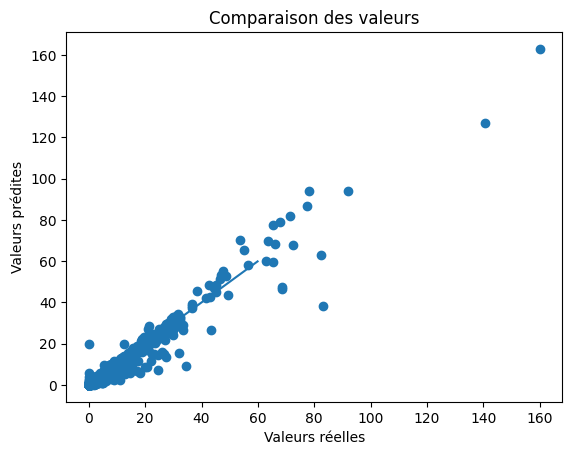

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_real_2, y_pred_real_2)
plt.xlabel("Valeurs r√©elles")
plt.ylabel("Valeurs pr√©dites")
plt.title("Comparaison des valeurs")
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], 'r--')  # diagonale parfaite
plt.show()


MAE (erreur absolue moyenne) est tr√®s similaire entre les deux (diff√©rence de 10‚Äì15 k‚Ç¨), donc les deux mod√®les font en moyenne des erreurs proches.

RMSE (erreur quadratique) est nettement meilleure avec Box-Cox, ce qui signifie que les grosses erreurs sont mieux ma√Ætris√©es.

R¬≤ (coefficient de d√©termination) est meilleur avec Box-Cox ‚Üí il explique plus de variance dans les donn√©es.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

model = XGBRegressor(random_state=42)
grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Meilleurs hyperparam√®tres :", grid.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Meilleurs hyperparam√®tres : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}


max_depth=7 ‚Üí le mod√®le capte des relations plus complexes.

learning_rate=0.05 ‚Üí Apprentissage plus lent mais plus pr√©cis (tr√®s bon).

colsample_bytree=0.8 ‚Üí 80% des colonnes sont √©chantillonn√©es √† chaque arbre ‚Üí bon pour la diversit√© des arbres.

subsample=1 ‚Üí Il prend 100% des lignes √† chaque arbre (tu pourrais tester 0.8 pour voir si √ßa am√©liore la robustesse).

n_estimators=100 ‚Üí 100 arbres = bon √©quilibre entre performance et temps de calcul.



In [ ]:
from xgboost import XGBRegressor

best_model = XGBRegressor(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=7,
    n_estimators=100,
    subsample=1,
    random_state=42
)

best_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_trans = best_model.predict(X_test)

# Inverser Box-Cox
from scipy.special import inv_boxcox
y_pred_real = inv_boxcox(y_pred_trans, fitted_lambda)
y_test_real = inv_boxcox(y_test, fitted_lambda)

# √âvaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test_real, y_pred_real))
print("RMSE:", np.sqrt(mean_squared_error(y_test_real, y_pred_real)))
print("R¬≤:", r2_score(y_test_real, y_pred_real))


MAE: 0.2907288355492672
RMSE: 1.3751998256558473
R¬≤: 0.9680279457894805


 Erreur r√©duite de ~22% 


Erreur quadratique r√©duite


 Pouvoir explicatif renforc√©

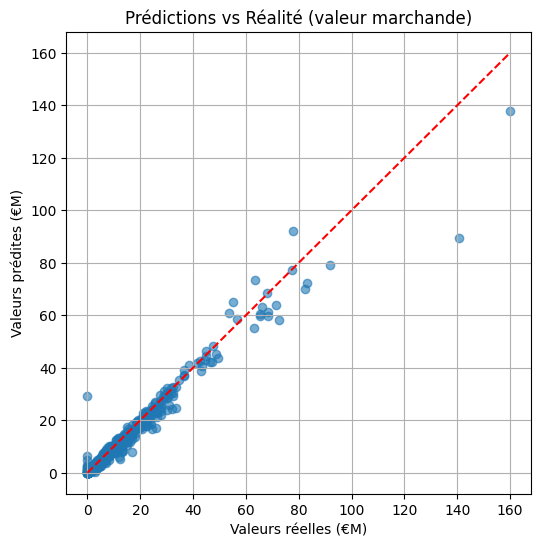

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.plot([min(y_test_real), max(y_test_real)],
         [min(y_test_real), max(y_test_real)],
         color='red', linestyle='--')
plt.xlabel("Valeurs r√©elles (‚Ç¨M)")
plt.ylabel("Valeurs pr√©dites (‚Ç¨M)")
plt.title("Pr√©dictions vs R√©alit√© (valeur marchande)")
plt.grid(True)
plt.show()


On va utiliser RandomForestRegressor pour pr√©dire market_value_m (via market_value_bc) et comparer ses performances √† XGBoost.



In [55]:

from sklearn.model_selection import train_test_split

# S√©paration des donn√©es
features = [
    'release_clause_m', 'international_reputation',
    'overall_rating', 'reactions', 'potential', 'composure',
    'vision', 'wage_k', 'shortpassing', 'ballcontrol'
]

X = df[features]  # ou garde seulement les features utiles
y = df['market_value_bc']  # Valeur transform√©e

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [57]:
from scipy.special import inv_boxcox

y_pred_trans = rf_model.predict(X_test)
y_pred_real = inv_boxcox(y_pred_trans, fitted_lambda)
y_test_real = inv_boxcox(y_test, fitted_lambda)


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2 = r2_score(y_test_real, y_pred_real)

print("üìä R√©sultats RandomForest :")
print(f"MAE : {mae:.4f} M‚Ç¨")
print(f"RMSE : {rmse:.4f} M‚Ç¨")
print(f"R¬≤ : {r2:.4f}")


üìä R√©sultats RandomForest :
MAE : 0.4214 M‚Ç¨
RMSE : 1.3631 M‚Ç¨
R¬≤ : 0.9846


In [60]:
X_test_copy = X_test.copy()
X_test_copy["true_value"] = y_test_real
X_test_copy["predicted_value"] = y_pred_real
X_test_copy["name"] = df.loc[X_test.index, "name"]

# Exemple de joueurs connus
exemples = ["kylian_mbappe"]
df_sample = X_test_copy[X_test_copy["name"].isin(exemples)]

# Sauvegarde et affichage
print(df_sample[["name", "true_value", "predicted_value"]])

Empty DataFrame
Columns: [name, true_value, predicted_value]
Index: []


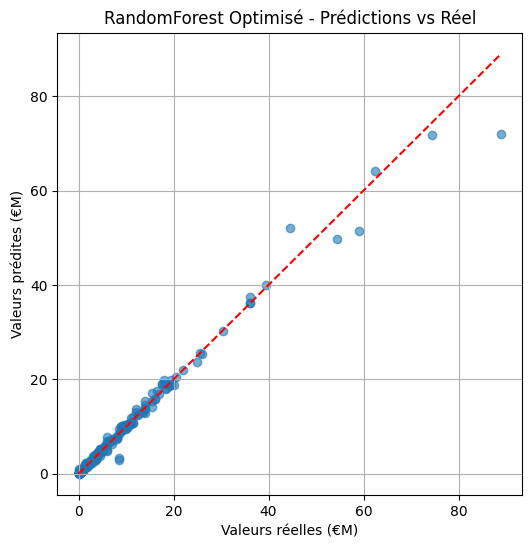

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.plot([min(y_test_real), max(y_test_real)],
         [min(y_test_real), max(y_test_real)],
         color='red', linestyle='--')
plt.xlabel("Valeurs r√©elles (‚Ç¨M)")
plt.ylabel("Valeurs pr√©dites (‚Ç¨M)")
plt.title("RandomForest Optimis√© - Pr√©dictions vs R√©el")
plt.grid(True)
plt.show()

In [ ]:
import joblib
import json

joblib.dump(rf_model, 'best_randomforest_market_value_model.pkl')
print("‚úÖ Mod√®le sauvegard√© sous : best_randomforest_market_value_model.pkl")

# Save fitted_lambda
with open('boxcox_lambda.json', 'w') as f:
    json.dump({'lambda': fitted_lambda}, f)

# Save feature list
with open('selected_features.json', 'w') as f:
    json.dump(features, f)



‚úÖ Mod√®le sauvegard√© sous : best_randomforest_market_value_model.pkl
